# Assignment 1

## Task 1  Regression  →  Superconductivity Data Set

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
import zipfile, requests, io
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip', stream=True)
zf = zipfile.ZipFile(io.BytesIO(r.content))
df_superconductivity = pd.read_csv(zf.open('train.csv'))

In [3]:
df_superconductivity.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [4]:
df_superconductivity.isnull().any().sum()

0

In [5]:
len(df_superconductivity.columns)

82

In [6]:
# Setting the dependent and independent variables
X = df_superconductivity.iloc[:,:81]
y = df_superconductivity.iloc[:, 81]

In [7]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [8]:
# Importing Linear Regression model and fitting the train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

In [9]:
print("Training set score: {:.3f}".format(linreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linreg.score(X_test, y_test)))

Training set score: 0.738
Test set score: 0.735


In [10]:
# Importing Ridge Regression model and fitting the train data
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

In [11]:
print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

Training set score: 0.737
Test set score: 0.735


Let's check accuracy score of the ridge linear model for other alpha values.

In [12]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.737
Test set score: 0.735


In [13]:
ridge5 = Ridge(alpha = 5).fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge5.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge5.score(X_test, y_test)))

Training set score: 0.736
Test set score: 0.734


In [14]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.735
Test set score: 0.733


In [15]:
ridge20 = Ridge(alpha = 20).fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge20.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge20.score(X_test, y_test)))

Training set score: 0.734
Test set score: 0.732


In [16]:
ridge50 = Ridge(alpha = 50).fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge50.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge50.score(X_test, y_test)))

Training set score: 0.732
Test set score: 0.730


Text(0.5, 1.0, 'Test Score by Alpha')

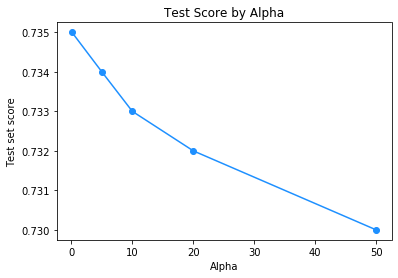

In [17]:
alphas = [0.1, 5, 10, 20, 50]
testscore = [0.735, 0.734, 0.733, 0.732, 0.730]
plt.plot(alphas, testscore, '-ok', color = 'dodgerblue')
plt.xlabel('Alpha')
plt.ylabel('Test set score')
plt.title("Test Score by Alpha")

Linear regression model seems to have a slightly better accuracy than ridge linear model.

In [18]:
# Showing the coefficients of the linear regression model
coefs = pd.DataFrame(linreg.coef_, columns=["Coefficients"], index=X.columns)
coefs

Coefficients
number_of_elements        -3.475227
mean_atomic_mass           0.795527
wtd_mean_atomic_mass      -0.839985
gmean_atomic_mass         -0.456160
wtd_gmean_atomic_mass      0.573408
...                             ...
wtd_entropy_Valence      -70.167614
range_Valence              5.314439
wtd_range_Valence         -0.684433
std_Valence                4.618308
wtd_std_Valence          -24.043813

[81 rows x 1 columns]

In [19]:
def plot_ridge():
    plt.figure(figsize=(20, 10))
    plt.plot(linreg.coef_, 'o', label="LinearRegression", color = 'mediumslateblue')
    plt.xticks(range(len(X.columns)), X.columns, rotation=90)
    plt.xlabel("Feature", fontdict = {'fontsize' : 15})
    plt.ylabel("Coefficient magnitude", {'fontsize' : 15})
    plt.title("Coefficient Magnitude by Feature", fontdict = {'fontsize' : 20})
    plt.hlines(0, 0, len(linreg.coef_))
    plt.ylim(-5, 5)
    plt.legend()

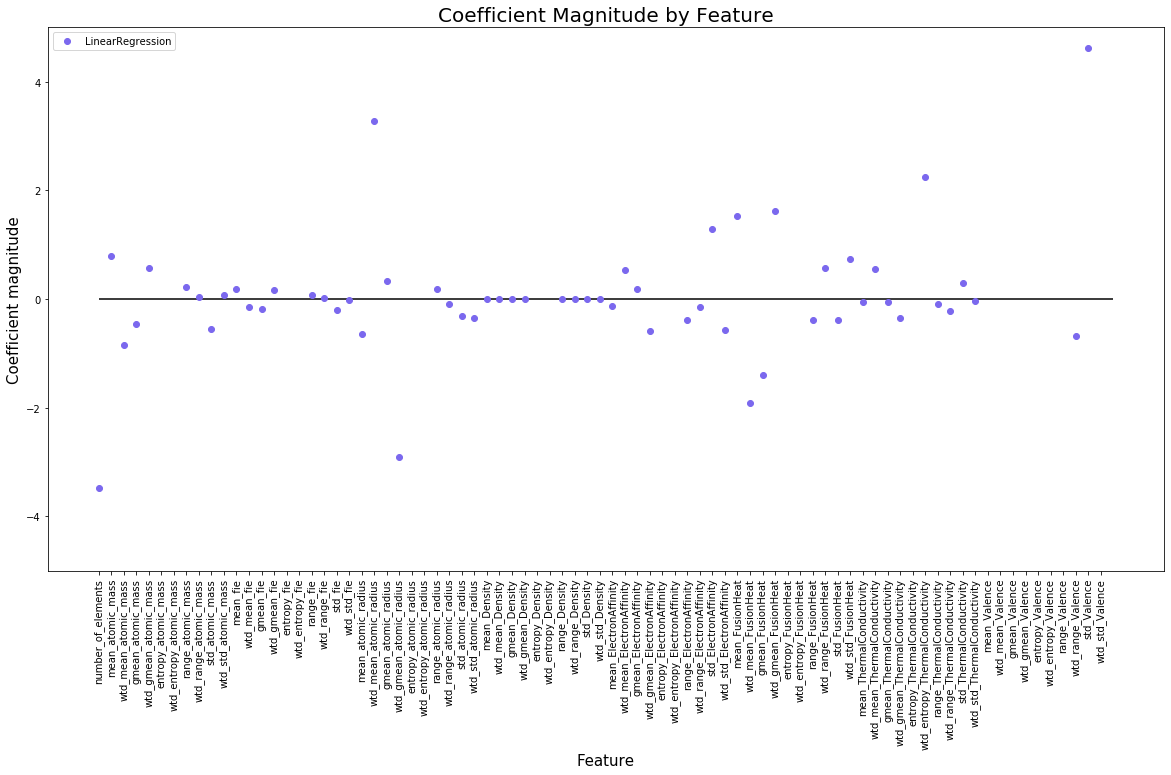

In [20]:
# Plotting coefficient magnitudes of the linear regression model by feature
plot_ridge()

## Task 2 Binary classification  →  Default of credit card clients Data Set

In [21]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Loading the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
s = requests.get(url).content
df_creditcard = pd.read_excel(s, skiprows = 1)

In [23]:
df_creditcard.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [24]:
df_creditcard.isnull().any().sum()

0

In [25]:
df_creditcard.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [26]:
len(df_creditcard.columns)

25

In [27]:
# Setting dependent(y) and independent variables(X).
X = df_creditcard.iloc[:, :24]
y = df_creditcard.iloc[:, 24]

In [28]:
# Deleting ID columns since it does not have any effect on the dependent variable.
del X['ID']

In [29]:
# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [30]:
# Importing K Neighbors Classifier and fitting the train data
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [31]:
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

Training set score: 0.783
Test set score: 0.778


In [32]:
# Importing Random Forest Classifier and fitting the train data
from sklearn.ensemble import RandomForestClassifier
forest10 = RandomForestClassifier(n_estimators=10, random_state=0)
forest10.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest10.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest10.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.816


Let's check the accuracy score of the Random Forest Classifier by changing the n_estimators parameter.

In [33]:
forest1 = RandomForestClassifier(n_estimators=1, random_state=0)
forest1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, y_test)))

Accuracy on training set: 0.901
Accuracy on test set: 0.737


In [34]:
forest5 = RandomForestClassifier(n_estimators=5, random_state=0)
forest5.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest5.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on test set: 0.799


In [35]:
forest50 = RandomForestClassifier(n_estimators=50, random_state=0)
forest50.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest50.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest50.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.823


In [36]:
forest100 = RandomForestClassifier(n_estimators=100, random_state=0)
forest100.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest100.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest100.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.822


Text(0.5, 1.0, 'Test Score by Number of Estimators')

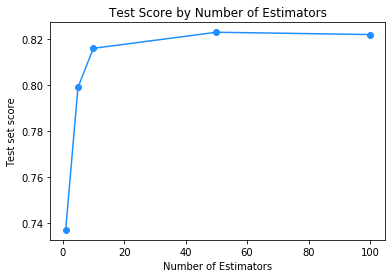

In [37]:
n_estimators = [1, 5, 10, 50, 100]
testscore = [0.737, 0.799, 0.816, 0.823, 0.822]
plt.plot(n_estimators, testscore, '-ok', color = 'dodgerblue')
plt.xlabel('Number of Estimators')
plt.ylabel('Test set score')
plt.title("Test Score by Number of Estimators")

It seems like the model has the best accuracy score when the n_estimators is 50.

In [38]:
def plot_feature_importances(model):
    plt.figure(figsize=(20, 10))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center', color = 'mediumslateblue')
    plt.yticks(np.arange(n_features), X.columns)
    plt.title('Feature importance for Credit Card dataset', fontdict = {'fontsize' : 20})
    plt.xlabel("Feature importance", {'fontsize' : 15})
    plt.ylabel("Feature", {'fontsize' : 15})

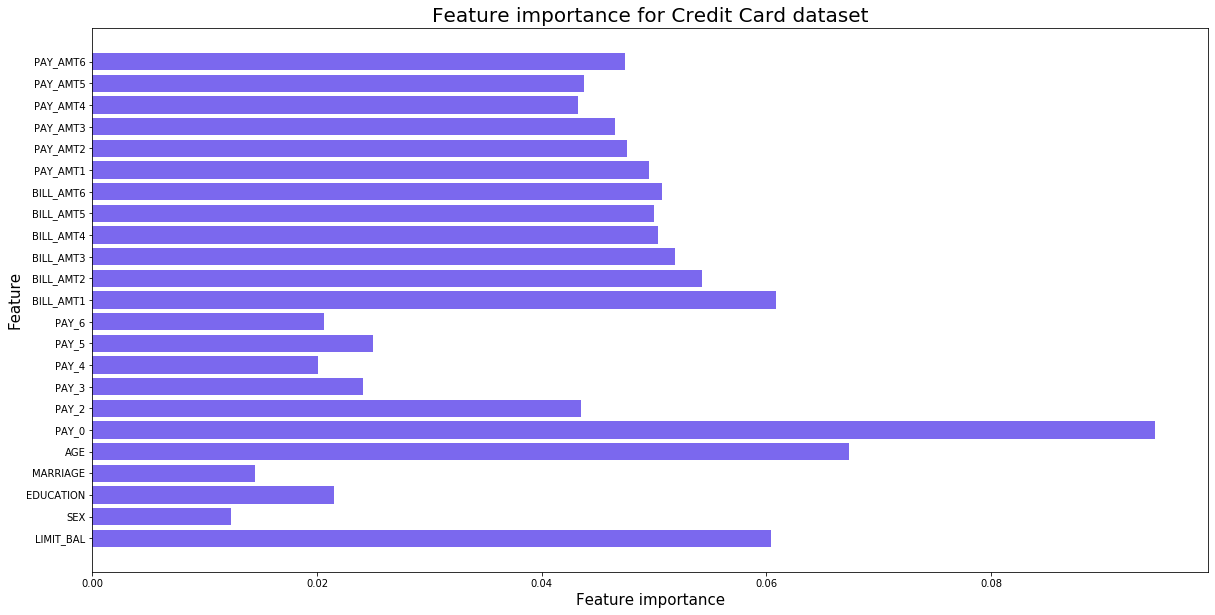

In [39]:
# Plotting the feature importance of random forest classifier model for the Credit Card dataset.
plot_feature_importances(forest50)

## Task 3 Multiclass & binary classification  →  Drug consumption (quantified) Data Set

In [40]:
# Loading the dataset
from io import BytesIO
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
s = requests.get(url).content
df_drug = pd.read_csv(BytesIO(s), header= None, index_col = 0)

In [41]:
pd.options.display.max_columns = None
df_drug

1        2        3        4        5        6        7        8   \
0                                                                              
1     0.49788  0.48246 -0.05921  0.96082  0.12600  0.31287 -0.57545 -0.58331   
2    -0.07854 -0.48246  1.98437  0.96082 -0.31685 -0.67825  1.93886  1.43533   
3     0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.46725  0.80523 -0.84732   
4    -0.95197  0.48246  1.16365  0.96082 -0.31685 -0.14882 -0.80615 -0.01928   
5     0.49788  0.48246  1.98437  0.96082 -0.31685  0.73545 -1.63340 -0.45174   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1884 -0.95197  0.48246 -0.61113 -0.57009 -0.31685 -1.19430  1.74091  1.88511   
1885 -0.95197 -0.48246 -0.61113 -0.57009 -0.31685 -0.24649  1.74091  0.58331   
1886 -0.07854  0.48246  0.45468 -0.57009 -0.31685  1.13281 -1.37639 -1.27553   
1887 -0.95197  0.48246 -0.61113 -0.57009 -0.31685  0.91093 -1.92173  0.29338   
1888 -0.95197 -0.48246 -0.61113  0.21128 -0.31685 -0.46725  2.12700  1.65653   

           9        10       11       12   13   14   15   16   17   18   19  \
0                                                                             
1    -0.91699 -0.00665 -0.21712 -1.18084  CL5  CL2  CL0  CL2  CL6  CL0  CL5   
2     0.76096 -0.14277 -0.71126 -0.21575  CL5  CL2  CL2  CL0  CL6  CL4  CL6   
3    -1.62090 -1.01450 -1.37983  0.40148  CL6  CL0  CL0  CL0  CL6  CL3  CL4   
4     0.59042  0.58489 -1.37983 -1.18084  CL4  CL0  CL0  CL3  CL5  CL2  CL4   
5    -0.30172  1.30612 -0.21712 -0.21575  CL4  CL1  CL1  CL0  CL6  CL3  CL6   
...       ...      ...      ...      ...  ...  ...  ...  ...  ...  ...  ...   
1884  0.76096 -1.13788  0.88113  1.92173  CL5  CL0  CL0  CL0  CL4  CL5  CL4   
1885  0.76096 -1.51840  0.88113  0.76540  CL5  CL0  CL0  CL0  CL5  CL3  CL4   
1886 -1.77200 -1.38502  0.52975 -0.52593  CL4  CL6  CL5  CL5  CL6  CL6  CL6   
1887 -1.62090 -2.57309  1.29221  1.22470  CL5  CL0  CL0  CL0  CL6  CL6  CL5   
1888  1.11406  0.41594  0.88113  1.22470  CL4  CL3  CL0  CL3  CL6  CL3  CL6   

       20   21   22   23   24   25   26   27   28   29   30   31  
0                                                                 
1     CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL2  CL0  CL0  
2     CL3  CL0  CL4  CL0  CL2  CL0  CL2  CL3  CL0  CL4  CL0  CL0  
3     CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL1  CL0  CL0  CL0  
4     CL2  CL0  CL0  CL0  CL2  CL0  CL0  CL0  CL0  CL2  CL0  CL0  
5     CL0  CL0  CL1  CL0  CL0  CL1  CL0  CL0  CL2  CL2  CL0  CL0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1884  CL0  CL0  CL0  CL0  CL0  CL3  CL3  CL0  CL0  CL0  CL0  CL5  
1885  CL0  CL0  CL2  CL0  CL0  CL3  CL5  CL4  CL4  CL5  CL0  CL0  
1886  CL4  CL0  CL4  CL0  CL2  CL0  CL2  CL0  CL2  CL6  CL0  CL0  
1887  CL0  CL0  CL3  CL0  CL0  CL3  CL3  CL0  CL3  CL4  CL0  CL0  
1888  CL3  CL0  CL3  CL0  CL0  CL3  CL3  CL0  CL3  CL6  CL0  CL2  

[1885 rows x 31 columns]

In [42]:
df_drug_new = df_drug.copy()

#### Prediction of LSD usage

I will fit 2 multiclass classification models(Stochastic Gradient Descent (SGD) and Random Forest Classifier) to predict the usage of lsd.

In [43]:
# Let's create a new class categorization for lsd usage

df_drug_new.loc[(df_drug_new[26] == 'CL0'),'NewLSDClass'] = 0
df_drug_new.loc[(df_drug_new[26] == 'CL1') | (df_drug_new[26] == 'CL2') | (df_drug_new[26] == 'CL3'),'NewLSDClass'] = 1
df_drug_new.loc[(df_drug_new[26] == 'CL4') | (df_drug_new[26] == 'CL5') | (df_drug_new[26] == 'CL6'),'NewLSDClass'] = 2

In [44]:
X = df_drug_new.iloc[:, :12] # Features
y_lsd = df_drug_new.iloc[:, -1] # New multiclass target 
y_lsd.astype('int64')

0
1       0
2       1
3       0
4       0
5       0
       ..
1884    1
1885    2
1886    1
1887    1
1888    1
Name: NewLSDClass, Length: 1885, dtype: int64

In [45]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_lsd, test_size=0.2, random_state=42)

In [46]:
# Training SGD Classifier model
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier().fit(X_train, y_train)

In [47]:
print("Training set score: {:.3f}".format(sgd.score(X_train, y_train)))
print("Test set score: {:.3f}".format(sgd.score(X_test, y_test)))

Training set score: 0.679
Test set score: 0.637


In [48]:
# Training Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
print("Training set score: {:.3f}".format(forest_clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.655


#### Prediction of Alcohol Usage

In [50]:
# Let's create a new class categorization for alcohol usage

df_drug_new.loc[(df_drug_new[13] == 'CL0'),'NewAlcoholClass'] = 0
df_drug_new.loc[(df_drug_new[13] == 'CL1') | (df_drug_new[13] == 'CL2') | (df_drug_new[13] == 'CL3'),'NewAlcoholClass'] = 1
df_drug_new.loc[(df_drug_new[13] == 'CL4') | (df_drug_new[13] == 'CL5') | (df_drug_new[13] == 'CL6'),'NewAlcoholClass'] = 2

In [51]:
df_drug_new.head(20)

1        2        3        4        5        6        7        8  \
0                                                                            
1   0.49788  0.48246 -0.05921  0.96082  0.12600  0.31287 -0.57545 -0.58331   
2  -0.07854 -0.48246  1.98437  0.96082 -0.31685 -0.67825  1.93886  1.43533   
3   0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.46725  0.80523 -0.84732   
4  -0.95197  0.48246  1.16365  0.96082 -0.31685 -0.14882 -0.80615 -0.01928   
5   0.49788  0.48246  1.98437  0.96082 -0.31685  0.73545 -1.63340 -0.45174   
6   2.59171  0.48246 -1.22751  0.24923 -0.31685 -0.67825 -0.30033 -1.55521   
7   1.09449 -0.48246  1.16365 -0.57009 -0.31685 -0.46725 -1.09207 -0.45174   
8   0.49788 -0.48246 -1.73790  0.96082 -0.31685 -1.32828  1.93886 -0.84732   
9   0.49788  0.48246 -0.05921  0.24923 -0.31685  0.62967  2.57309 -0.97631   
10  1.82213 -0.48246  1.16365  0.96082 -0.31685 -0.24649  0.00332 -1.42424   
11 -0.07854  0.48246  0.45468  0.96082 -0.31685 -1.05308  0.80523 -1.11902   
12  1.09449 -0.48246 -0.61113 -0.28519 -0.31685 -1.32828  0.00332  0.14143   
13  1.82213  0.48246  0.45468  0.96082 -0.31685  2.28554  0.16767  0.44585   
14  1.82213  0.48246 -0.05921  0.24923 -0.31685 -0.79151  0.80523 -0.01928   
15  1.82213  0.48246 -0.05921  0.96082 -0.31685 -0.92104  1.45421  0.44585   
16  1.82213 -0.48246  0.45468  0.96082 -0.31685 -2.05048 -1.50796 -1.55521   
17  0.49788  0.48246 -0.61113  0.96082 -0.31685 -1.55078 -0.80615 -1.68062   
18  1.09449 -0.48246 -1.73790  0.96082 -0.31685  0.52135 -1.23177 -0.31776   
19  1.82213 -0.48246  0.45468 -0.09765 -0.31685  1.37297 -0.15487 -0.17779   
20  0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.34799 -1.76250 -2.39883   

          9       10       11       12   13   14   15   16   17   18   19  \
0                                                                           
1  -0.91699 -0.00665 -0.21712 -1.18084  CL5  CL2  CL0  CL2  CL6  CL0  CL5   
2   0.76096 -0.14277 -0.71126 -0.21575  CL5  CL2  CL2  CL0  CL6  CL4  CL6   
3  -1.62090 -1.01450 -1.37983  0.40148  CL6  CL0  CL0  CL0  CL6  CL3  CL4   
4   0.59042  0.58489 -1.37983 -1.18084  CL4  CL0  CL0  CL3  CL5  CL2  CL4   
5  -0.30172  1.30612 -0.21712 -0.21575  CL4  CL1  CL1  CL0  CL6  CL3  CL6   
6   2.03972  1.63088 -1.37983 -1.54858  CL2  CL0  CL0  CL0  CL6  CL0  CL4   
7  -0.30172  0.93949 -0.21712  0.07987  CL6  CL0  CL0  CL0  CL6  CL1  CL5   
8  -0.30172  1.63088  0.19268 -0.52593  CL5  CL0  CL0  CL0  CL6  CL0  CL4   
9   0.76096  1.13407 -1.37983 -1.54858  CL4  CL0  CL0  CL0  CL6  CL0  CL6   
10  0.59042  0.12331 -1.37983 -0.84637  CL6  CL1  CL0  CL1  CL6  CL1  CL6   
11 -0.76096  1.81175  0.19268  0.07987  CL5  CL0  CL1  CL0  CL6  CL2  CL5   
12 -1.92595 -0.52745  0.52975  1.22470  CL5  CL1  CL0  CL0  CL6  CL4  CL5   
13 -1.62090 -0.78155  1.29221  0.07987  CL5  CL1  CL0  CL4  CL6  CL3  CL5   
14  0.94156  3.46436 -0.71126 -0.84637  CL1  CL0  CL0  CL0  CL5  CL0  CL0   
15 -0.60633  1.63088  1.29221  0.76540  CL6  CL0  CL0  CL0  CL6  CL0  CL6   
16 -1.07533  1.13407 -0.71126 -0.52593  CL5  CL2  CL2  CL0  CL6  CL1  CL5   
17  0.28783  0.75830 -0.21712 -2.07848  CL6  CL0  CL0  CL1  CL6  CL3  CL5   
18 -0.45321 -1.38502 -1.37983 -0.84637  CL6  CL1  CL1  CL0  CL6  CL6  CL4   
19 -1.92595 -1.51840 -0.71126 -0.21575  CL6  CL2  CL0  CL2  CL6  CL3  CL6   
20 -1.92595  0.75830 -1.37983 -2.07848  CL4  CL1  CL0  CL0  CL6  CL1  CL6   

     20   21   22   23   24   25   26   27   28   29   30   31  NewLSDClass  \
0                                                                             
1   CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL2  CL0  CL0          0.0   
2   CL3  CL0  CL4  CL0  CL2  CL0  CL2  CL3  CL0  CL4  CL0  CL0          1.0   
3   CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL1  CL0  CL0  CL0          0.0   
4   CL2  CL0  CL0  CL0  CL2  CL0  CL0  CL0  CL0  CL2  CL0  CL0          0.0   
5   CL0  CL0  CL1  CL0  CL0  CL1  CL0  CL0  CL2  CL2  CL0  CL0          0.0   
6   CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  C

In [52]:
X = df_drug_new.iloc[:, :12] # Features
y_alcohol = df_drug_new.iloc[:, -1] # New multiclass target 
y_alcohol.astype('int64')

0
1       2
2       2
3       2
4       2
5       2
       ..
1884    2
1885    2
1886    2
1887    2
1888    2
Name: NewAlcoholClass, Length: 1885, dtype: int64

In [53]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_alcohol, test_size=0.2, random_state=40)

In [54]:
# Training SGD Classifier model
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier().fit(X_train, y_train)

In [55]:
print("Training set score: {:.3f}".format(sgd.score(X_train, y_train)))
print("Test set score: {:.3f}".format(sgd.score(X_test, y_test)))

Training set score: 0.835
Test set score: 0.775


In [56]:
# Training Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
print("Training set score: {:.3f}".format(forest_clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.780


#### Simple Manual Optimization  for SGD Classifier

In [58]:
forest_clf100 = RandomForestClassifier(n_estimators = 100)
forest_clf100.fit(X_train, y_train)
print("Training set score: {:.3f}".format(forest_clf100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf100.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.769


In [59]:
forest_clf50 = RandomForestClassifier(n_estimators = 50)
forest_clf50.fit(X_train, y_train)
print("Training set score: {:.3f}".format(forest_clf50.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf50.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.769


In [60]:
forest_clf20 = RandomForestClassifier(n_estimators = 20)
forest_clf20.fit(X_train, y_train)
print("Training set score: {:.3f}".format(forest_clf20.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf20.score(X_test, y_test)))

Training set score: 0.996
Test set score: 0.777


In [61]:
forest_clf10 = RandomForestClassifier(n_estimators = 10)
forest_clf10.fit(X_train, y_train)
print("Training set score: {:.3f}".format(forest_clf10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf10.score(X_test, y_test)))

Training set score: 0.995
Test set score: 0.753


In [62]:
forest_clf4 = RandomForestClassifier(n_estimators = 4)
forest_clf4.fit(X_train, y_train)
print("Training set score: {:.3f}".format(forest_clf4.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf4.score(X_test, y_test)))

Training set score: 0.964
Test set score: 0.679


In [63]:
forest_clf1 = RandomForestClassifier(n_estimators = 1)
forest_clf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(forest_clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest_clf1.score(X_test, y_test)))

Training set score: 0.892
Test set score: 0.674


Text(0.5, 1.0, 'Test Score by Number of Estimator')

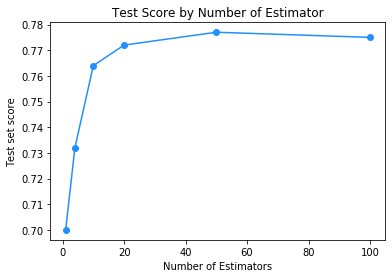

In [64]:
n_estimators = [1, 4, 10, 20, 50, 100]
testscore = [0.700, 0.732, 0.764, 0.772, 0.777, 0.775]
plt.plot(n_estimators, testscore, '-ok', color = 'dodgerblue')
plt.xlabel('Number of Estimators')
plt.ylabel('Test set score')
plt.title("Test Score by Number of Estimator")

### Fitting Random Forest Classifier for the rest of the targets

In [65]:
df_drug_new

1        2        3        4        5        6        7        8  \
0                                                                              
1     0.49788  0.48246 -0.05921  0.96082  0.12600  0.31287 -0.57545 -0.58331   
2    -0.07854 -0.48246  1.98437  0.96082 -0.31685 -0.67825  1.93886  1.43533   
3     0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.46725  0.80523 -0.84732   
4    -0.95197  0.48246  1.16365  0.96082 -0.31685 -0.14882 -0.80615 -0.01928   
5     0.49788  0.48246  1.98437  0.96082 -0.31685  0.73545 -1.63340 -0.45174   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1884 -0.95197  0.48246 -0.61113 -0.57009 -0.31685 -1.19430  1.74091  1.88511   
1885 -0.95197 -0.48246 -0.61113 -0.57009 -0.31685 -0.24649  1.74091  0.58331   
1886 -0.07854  0.48246  0.45468 -0.57009 -0.31685  1.13281 -1.37639 -1.27553   
1887 -0.95197  0.48246 -0.61113 -0.57009 -0.31685  0.91093 -1.92173  0.29338   
1888 -0.95197 -0.48246 -0.61113  0.21128 -0.31685 -0.46725  2.12700  1.65653   

            9       10       11       12   13   14   15   16   17   18   19  \
0                                                                             
1    -0.91699 -0.00665 -0.21712 -1.18084  CL5  CL2  CL0  CL2  CL6  CL0  CL5   
2     0.76096 -0.14277 -0.71126 -0.21575  CL5  CL2  CL2  CL0  CL6  CL4  CL6   
3    -1.62090 -1.01450 -1.37983  0.40148  CL6  CL0  CL0  CL0  CL6  CL3  CL4   
4     0.59042  0.58489 -1.37983 -1.18084  CL4  CL0  CL0  CL3  CL5  CL2  CL4   
5    -0.30172  1.30612 -0.21712 -0.21575  CL4  CL1  CL1  CL0  CL6  CL3  CL6   
...       ...      ...      ...      ...  ...  ...  ...  ...  ...  ...  ...   
1884  0.76096 -1.13788  0.88113  1.92173  CL5  CL0  CL0  CL0  CL4  CL5  CL4   
1885  0.76096 -1.51840  0.88113  0.76540  CL5  CL0  CL0  CL0  CL5  CL3  CL4   
1886 -1.77200 -1.38502  0.52975 -0.52593  CL4  CL6  CL5  CL5  CL6  CL6  CL6   
1887 -1.62090 -2.57309  1.29221  1.22470  CL5  CL0  CL0  CL0  CL6  CL6  CL5   
1888  1.11406  0.41594  0.88113  1.22470  CL4  CL3  CL0  CL3  CL6  CL3  CL6   

       20   21   22   23   24   25   26   27   28   29   30   31  NewLSDClass  \
0                                                                               
1     CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL2  CL0  CL0          0.0   
2     CL3  CL0  CL4  CL0  CL2  CL0  CL2  CL3  CL0  CL4  CL0  CL0          1.0   
3     CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL1  CL0  CL0  CL0          0.0   
4     CL2  CL0  CL0  CL0  CL2  CL0  CL0  CL0  CL0  CL2  CL0  CL0          0.0   
5     CL0  CL0  CL1  CL0  CL0  CL1  CL0  CL0  CL2  CL2  CL0  CL0          0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...          ...   
1884  CL0  CL0  CL0  CL0  CL0  CL3  CL3  CL0  CL0  CL0  CL0  CL5          1.0   
1885  CL0  CL0  CL2  CL0  CL0  CL3  CL5  CL4  CL4  CL5  CL0  CL0          2.0   
1886  CL4  CL0  CL4  CL0  CL2  CL0  CL2  CL0  CL2  CL6  CL0  CL0          1.0   
1887  CL0  CL0  CL3  CL0  CL0  CL3  CL3  CL0  CL3  CL4  CL0  CL0          1.0   
1888  CL3  CL0  CL3  CL0  CL0  CL3  CL3  CL0  CL3  CL6  CL0  CL2          1.0   

      NewAlcoholClass  
0                      
1                 2.0  
2                 2.0  
3                 2.0  
4                 2.0  
5                 2.0  
...               ...  
1884              2.0  
1885              2.0  
1886              2.0  
1887              2.0  
1888              2.0  

[1885 rows x 33 columns]

In [66]:
df_drug_new.replace('CL0', 0, inplace = True)
df_drug_new.replace('CL1', 1, inplace = True)
df_drug_new.replace('CL2', 2, inplace = True)
df_drug_new.replace('CL3', 3, inplace = True)
df_drug_new.replace('CL4', 4, inplace = True)
df_drug_new.replace('CL5', 5, inplace = True)
df_drug_new.replace('CL6', 6, inplace = True)

In [67]:
df_drug_new

1        2        3        4        5        6        7        8  \
0                                                                              
1     0.49788  0.48246 -0.05921  0.96082  0.12600  0.31287 -0.57545 -0.58331   
2    -0.07854 -0.48246  1.98437  0.96082 -0.31685 -0.67825  1.93886  1.43533   
3     0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.46725  0.80523 -0.84732   
4    -0.95197  0.48246  1.16365  0.96082 -0.31685 -0.14882 -0.80615 -0.01928   
5     0.49788  0.48246  1.98437  0.96082 -0.31685  0.73545 -1.63340 -0.45174   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1884 -0.95197  0.48246 -0.61113 -0.57009 -0.31685 -1.19430  1.74091  1.88511   
1885 -0.95197 -0.48246 -0.61113 -0.57009 -0.31685 -0.24649  1.74091  0.58331   
1886 -0.07854  0.48246  0.45468 -0.57009 -0.31685  1.13281 -1.37639 -1.27553   
1887 -0.95197  0.48246 -0.61113 -0.57009 -0.31685  0.91093 -1.92173  0.29338   
1888 -0.95197 -0.48246 -0.61113  0.21128 -0.31685 -0.46725  2.12700  1.65653   

            9       10       11       12  13  14  15  16  17  18  19  20  21  \
0                                                                              
1    -0.91699 -0.00665 -0.21712 -1.18084   5   2   0   2   6   0   5   0   0   
2     0.76096 -0.14277 -0.71126 -0.21575   5   2   2   0   6   4   6   3   0   
3    -1.62090 -1.01450 -1.37983  0.40148   6   0   0   0   6   3   4   0   0   
4     0.59042  0.58489 -1.37983 -1.18084   4   0   0   3   5   2   4   2   0   
5    -0.30172  1.30612 -0.21712 -0.21575   4   1   1   0   6   3   6   0   0   
...       ...      ...      ...      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1884  0.76096 -1.13788  0.88113  1.92173   5   0   0   0   4   5   4   0   0   
1885  0.76096 -1.51840  0.88113  0.76540   5   0   0   0   5   3   4   0   0   
1886 -1.77200 -1.38502  0.52975 -0.52593   4   6   5   5   6   6   6   4   0   
1887 -1.62090 -2.57309  1.29221  1.22470   5   0   0   0   6   6   5   0   0   
1888  1.11406  0.41594  0.88113  1.22470   4   3   0   3   6   3   6   3   0   

      22  23  24  25  26  27  28  29  30  31  NewLSDClass  NewAlcoholClass  
0                                                                           
1      0   0   0   0   0   0   0   2   0   0          0.0              2.0  
2      4   0   2   0   2   3   0   4   0   0          1.0              2.0  
3      0   0   0   0   0   0   1   0   0   0          0.0              2.0  
4      0   0   2   0   0   0   0   2   0   0          0.0              2.0  
5      1   0   0   1   0   0   2   2   0   0          0.0              2.0  
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..          ...              ...  
1884   0   0   0   3   3   0   0   0   0   5          1.0              2.0  
1885   2   0   0   3   5   4   4   5   0   0          2.0              2.0  
1886   4   0   2   0   2   0   2   6   0   0          1.0              2.0  
1887   3   0   0   3   3   0   3   4   0   0          1.0              2.0  
1888   3   0   0   3   3   0   3   6   0   2          1.0              2.0  

[1885 rows x 33 columns]

In [68]:
from sklearn.metrics import accuracy_score

for a in range (12, 31):
    y = df_drug_new.iloc[:, a] # New multiclass target 
    X = df_drug_new.iloc[:, :12]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

    forest_clf = RandomForestClassifier(n_estimators = 50)
    forest_clf.fit(X_train, y_train)
    y_pred = forest_clf.predict(X_test)

    print("Accuracy score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.387
Accuracy score: 0.541
Accuracy score: 0.703
Accuracy score: 0.504
Accuracy score: 0.737
Accuracy score: 0.371
Accuracy score: 0.390
Accuracy score: 0.549
Accuracy score: 0.865
Accuracy score: 0.509
Accuracy score: 0.849
Accuracy score: 0.769
Accuracy score: 0.581
Accuracy score: 0.538
Accuracy score: 0.732
Accuracy score: 0.546
Accuracy score: 0.379
Accuracy score: 0.992
Accuracy score: 0.777


In [69]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

In [70]:
matrix

array([[292,   2,   1,   0,   0,   0,   0],
       [ 30,   1,   0,   0,   0,   0,   0],
       [ 28,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0],
       [  4,   0,   1,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
import seaborn as sns

for a in range (12, 31):
    y = df_drug_new.iloc[:, a] # New multiclass target 
    X = df_drug_new.iloc[:, :12]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

    forest_clf = RandomForestClassifier(n_estimators = 50)
    forest_clf.fit(X_train, y_train)
    y_pred = forest_clf.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy score: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print(matrix)

Accuracy score: 0.355
[[  0   0   0   0   1   6   3]
 [  0   1   0   0   0   9   2]
 [  0   0   0   0   0  16   1]
 [  0   0   0   1   5  32   8]
 [  0   0   0   3   6  44   8]
 [  0   0   0   3   7 104  25]
 [  0   0   0   4   2  64  22]]
Accuracy score: 0.520
[[180   4   5   6   1   0   2]
 [ 28   6   4   0   0   0   2]
 [ 36   4   2   6   0   0   0]
 [ 28   1   4   7   0   0   1]
 [ 15   0   1   3   0   0   2]
 [  6   1   2   5   0   1   1]
 [ 11   0   0   2   0   0   0]]
Accuracy score: 0.700
[[256   2   2   2   0   0]
 [ 33   2   2   1   0   0]
 [ 43   1   6   0   0   0]
 [ 17   2   0   0   0   0]
 [  3   0   1   0   0   0]
 [  4   0   0   0   0   0]]
Accuracy score: 0.515
[[183   0   4   5   0   0   1]
 [ 19   0   2   1   0   0   1]
 [ 51   0   3   4   0   0   1]
 [ 34   1   5   5   0   1   1]
 [ 11   0   3   4   1   0   1]
 [ 13   0   1   4   2   0   1]
 [  6   0   2   2   2   0   2]]
Accuracy score: 0.735
[[  0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   1]
 [  0   0  

The accuracy score changes greatly depending on the target.

#### Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
######  one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).

In [72]:
df1 = df_drug_new.copy()

#### Alcohol

In [73]:
df1.loc[(df1[13] == 0) | (df1[13] == 1) | (df1[13] == 2)
                | (df1[13] == 4)| (df1[13] == 5)| (df1[13] == 6), 13] = 1

In [74]:
df1.loc[(df1[13] == 3), 13] = 0

In [75]:
from sklearn.neighbors import KNeighborsClassifier
X = df1.iloc[:, :12]
y = df1.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.902


#### Amphetamines

In [76]:
df1.loc[(df1[14] == 0) | (df1[14] == 1) | (df1[14] == 2)
                | (df1[14] == 4)| (df1[14] == 5)| (df1[14] == 6), 14] = 1
df1.loc[(df1[14] == 3), 14] = 0

In [77]:
from sklearn.neighbors import KNeighborsClassifier
X = df1.iloc[:, :12]
y = df1.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.875


#### Amyl Nitrite

In [78]:
df1.loc[(df1[15] == 0) | (df1[15] == 1) | (df1[15] == 2)
                | (df1[15] == 4)| (df1[15] == 5)| (df1[15] == 6), 15] = 1
df1.loc[(df1[15] == 3), 15] = 0

In [79]:
from sklearn.neighbors import KNeighborsClassifier
X = df1.iloc[:, :12]
y = df1.iloc[:, 14]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.928


###### one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).

In [80]:
df2 = df_drug_new.copy()

###### Alcohol

In [81]:
df2.loc[(df1[13] == 0) | (df2[13] == 1) | (df2[13] == 2) | (df2[13] == 5) | (df2[13] == 6), 13] = 1

In [82]:
df2.loc[(df2[13] == 3) | (df2[13] == 4), 13] = 0

In [83]:
from sklearn.neighbors import KNeighborsClassifier
X = df2.iloc[:, :12]
y = df2.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.828


###### Amphetamines

In [84]:
df2.loc[(df1[14] == 0) | (df2[14] == 1) | (df2[14] == 2) | (df2[14] == 5) | (df2[14] == 6), 14] = 1

In [85]:
df2.loc[(df2[14] == 3) | (df2[14] == 4), 14] = 0

In [86]:
from sklearn.neighbors import KNeighborsClassifier
X = df2.iloc[:, :12]
y = df2.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.589


###### Amyl Nitrite

In [87]:
df2.loc[(df2[15] == 0) | (df2[15] == 1) | (df2[15] == 2) | (df2[15] == 5) | (df2[15] == 6), 15] = 1

In [88]:
df2.loc[(df2[15] == 3) | (df2[15] == 4), 15] = 0

In [89]:
from sklearn.neighbors import KNeighborsClassifier
X = df2.iloc[:, :12]
y = df2.iloc[:, 14]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.912


###### one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).

In [90]:
df3 = df_drug_new.copy()

###### Alcohol

In [91]:
df3.loc[(df3[13] == 0) | (df3[13] == 1) | (df3[13] == 2) | (df3[13] == 6), 13] = 1

In [92]:
df3.loc[(df2[13] == 3) | (df3[13] == 4) | (df3[13] == 5), 13] = 0

In [93]:
from sklearn.neighbors import KNeighborsClassifier
X = df3.iloc[:, :12]
y = df3.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.565


###### Amphetamines

In [94]:
df3.loc[(df3[14] == 0) | (df3[14] == 1) | (df3[14] == 2) | (df3[14] == 6), 14] = 1

In [95]:
df3.loc[(df2[14] == 3) | (df3[14] == 4) | (df3[14] == 5), 14] = 0

In [96]:
from sklearn.neighbors import KNeighborsClassifier
X = df3.iloc[:, :12]
y = df3.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.814


###### Amyl Nitrite

In [97]:
df3.loc[(df3[15] == 0) | (df3[15] == 1) | (df3[15] == 2) | (df3[15] == 6), 15] = 1

In [98]:
df3.loc[(df2[15] == 3) | (df3[15] == 4) | (df3[15] == 5), 15] = 0

In [99]:
from sklearn.neighbors import KNeighborsClassifier
X = df3.iloc[:, :12]
y = df3.iloc[:, 14]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: {:.3f}'.format(accuracy))

Accuracy Score: 0.905


The accuracy score of the model has a tendency to decrease as we add more variables to the class 0.

The model with the best accuracy score is the first one which is 'one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).'